Hanna Olsson 
Johan Östling


# Imports

In [45]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image, ImageDraw
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np



**Mount to drive**

# Introduction

In [30]:
data_gen = ImageDataGenerator(rescale=1.0/255)
#?usp=share_link
imgdir = r'\Users\johan\OneDrive\Dokument\GitHub\PA5\a5_images' # or wherever you put them...
img_size = 64
batch_size = 32


train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

validation_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [31]:
Xbatch, Ybatch = train_generator.next()

In [32]:
Xbatch.shape

(32, 64, 64, 3)

0.0

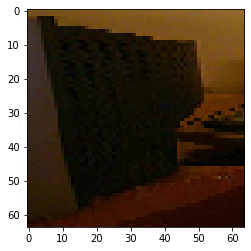

In [33]:
plt.imshow(Xbatch[5]);
Ybatch[5]

# Part 1: Training a convolutional neural network

In [34]:
def make_convnet(train, validation):
    model = Sequential()

    #before sending each pixel to the "ordinary" NN, we use convulational layers to shrink the feature map

    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3))) #We use 16 3x3 filters with the activation function 'relu'.

    model.add(MaxPooling2D(pool_size=(2, 2))) #this goes though 2x2 non-overlapping pixels in the feature map after the filtering a chooses the maximum value.

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    #add the fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) #sigmoid for binary classification

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

    history = model.fit(train,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data = validation,
    validation_steps=8)

    return history


In [35]:
history = make_convnet(train_generator, validation_generator)

Epoch 1/15
8/8 [==============================] - 2s 199ms/step - loss: 0.7210 - accuracy: 0.5156 - val_loss: 0.6797 - val_accuracy: 0.5312
Epoch 2/15
8/8 [==============================] - 1s 151ms/step - loss: 0.6603 - accuracy: 0.5820 - val_loss: 0.6290 - val_accuracy: 0.6836
Epoch 3/15
8/8 [==============================] - 1s 143ms/step - loss: 0.6192 - accuracy: 0.6836 - val_loss: 0.6067 - val_accuracy: 0.6641
Epoch 4/15
8/8 [==============================] - 1s 138ms/step - loss: 0.5787 - accuracy: 0.6992 - val_loss: 0.5820 - val_accuracy: 0.7188
Epoch 5/15
8/8 [==============================] - 1s 133ms/step - loss: 0.5366 - accuracy: 0.7461 - val_loss: 0.5425 - val_accuracy: 0.7383
Epoch 6/15
8/8 [==============================] - 1s 133ms/step - loss: 0.5389 - accuracy: 0.7383 - val_loss: 0.5388 - val_accuracy: 0.7344
Epoch 7/15
8/8 [==============================] - 1s 129ms/step - loss: 0.4866 - accuracy: 0.7617 - val_loss: 0.4861 - val_accuracy: 0.7773
Epoch 8/15
8/8 [====

Plot of the training and validation loss for each epoch

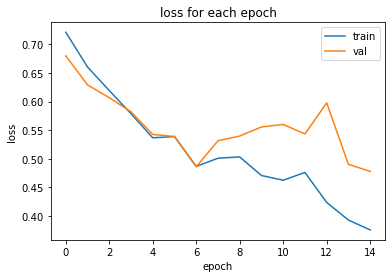

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss for each epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Plot of the training and validation accuracies for each epoch

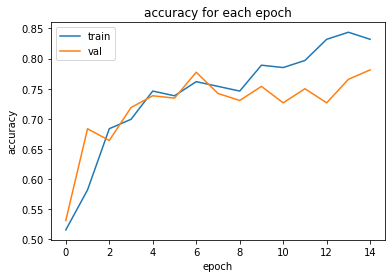

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy for each epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Part 2: Data augmentation

In [38]:
data_gen_augmented = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=5,  # Randomly rotate images within the range of 5 degrees
    horizontal_flip=True,  # Randomly flip images horizontally
    brightness_range=(0.9, 1.1),  # Randomly adjust brightness between 0.9 and 1.1
    channel_shift_range=5,  # Randomly shift colors within the range of 5
)

train_generator_augmented = data_gen_augmented.flow_from_directory(
    imgdir + '/train',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    classes=['other', 'car'],
    seed=12345,
    shuffle=True
)



Found 1600 images belonging to 2 classes.


In [39]:
history_aug = make_convnet(train_generator_augmented, validation_generator)

Epoch 1/15
8/8 [==============================] - 2s 173ms/step - loss: 0.6957 - accuracy: 0.5898 - val_loss: 0.6532 - val_accuracy: 0.6562
Epoch 2/15
8/8 [==============================] - 1s 156ms/step - loss: 0.6376 - accuracy: 0.6523 - val_loss: 0.5739 - val_accuracy: 0.7266
Epoch 3/15
8/8 [==============================] - 1s 156ms/step - loss: 0.5825 - accuracy: 0.6992 - val_loss: 0.6102 - val_accuracy: 0.6641
Epoch 4/15
8/8 [==============================] - 1s 158ms/step - loss: 0.5163 - accuracy: 0.7344 - val_loss: 0.5915 - val_accuracy: 0.6719
Epoch 5/15
8/8 [==============================] - 1s 161ms/step - loss: 0.5966 - accuracy: 0.6797 - val_loss: 0.5228 - val_accuracy: 0.7422
Epoch 6/15
8/8 [==============================] - 1s 158ms/step - loss: 0.5631 - accuracy: 0.6953 - val_loss: 0.5543 - val_accuracy: 0.7422
Epoch 7/15
8/8 [==============================] - 1s 163ms/step - loss: 0.5304 - accuracy: 0.7656 - val_loss: 0.5690 - val_accuracy: 0.7227
Epoch 8/15
8/8 [====

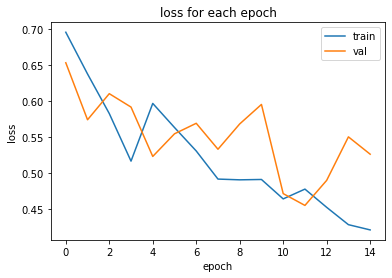

In [40]:
plt.plot(history_aug.history['loss'])
plt.plot(history_aug.history['val_loss'])
plt.title('loss for each epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

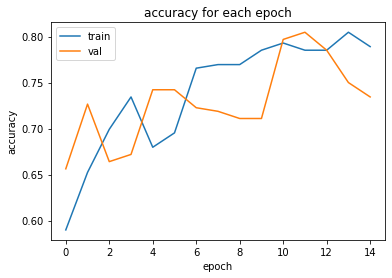

In [41]:
plt.plot(history_aug.history['accuracy'])
plt.plot(history_aug.history['val_accuracy'])
plt.title('accuracy for each epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

From our plots we can still see that the model is overfitting. Compared to the model when it used non-augmented training data there could be a difference, but it is not clear when looking at the plots. Perhaps it would be more clear if we had bigger instance of training data, because intuively it is reasonable that using augmented training data would make the model better at generalising to new data and therefore decreasing its overfitting. But from the plots we have done, we can't make any conclusions. 

When playing around with parameters of the augmentation, we noticed that when making the parameters high, like rotating with 30 degrees and shift colours by 50, the model started to underfit. This is probably because the images become to random and it gets hard for the model to recognise patterns in the images. Therefore we changed the parameters to smaller values, and then the model stopped underfitting. Even though we did not see any improvements in terms of overfitting when augementing the training data, we believe that the tradeoff betweeen underfitting and overfitting when using augmented data is that putting high parameters values for the augmentation, increases underfitting, and putting to small parameters makes the model more likely to overfit. Hence the parameters needs to be just right to balance the tradeoff between underfitting and overfitting. 

**Interlude: Applying a pre-trained convolutional neural network**

In [42]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

vggmodel = applications.VGG16(weights='imagenet', include_top=True)

553476096/553467096 [==============================] - 56s 0us/step


In [43]:
from tensorflow.keras.applications.vgg16 import decode_predictions


image = load_img(r'\Users\johan\OneDrive\Dokument\GitHub\PA5\a5_images/train/car/0005.jpg', target_size=(224,224)) #Image is a racing car
image_arr = img_to_array(image)
image_proc = preprocess_input(image_arr)
image_final = image_proc.reshape(1, 224, 224, 3)
pred = vggmodel.predict(image_final)
decoded_pred = decode_predictions(pred, top=3)[0]
decoded_pred

49152/35363 [=========================================] - 0s 0us/step


[('n03345487', 'fire_engine', 0.2906942),
 ('n04461696', 'tow_truck', 0.22112109),
 ('n03478589', 'half_track', 0.10861475)]

Looking at the top three precdictions, all of them are different types of cars so in that sense the predictions make sense. However the provided image was a racing car which does not correspond with any of the predictions (fire engine, tow truck and half track). So in conclusion this model is good at predicting wheter the image is a car or not, but fails to specify which type of car.

# Part 3: Using VGG-16 as a feature extractor

In [44]:
feature_extractor = applications.VGG16(include_top=False, weights='imagenet', input_shape=(64, 64, 3))

vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

58900480/58889256 [==============================] - 6s 0us/step


In [48]:
imgdir = r'\Users\johan\OneDrive\Dokument\GitHub\PA5\a5_images' # or wherever you put them...
img_size = 64
batch_size = 32

def create_vgg16_features(dataset):
    train_generator_vgg = vgg_data_gen.flow_from_directory(
            imgdir + '/'+ dataset,
            target_size=(img_size, img_size),
            batch_size=batch_size,
            class_mode='binary',
            classes=['other', 'car'],
            seed=12345,
            shuffle=False)
    
    cnn_features = feature_extractor.predict(train_generator_vgg)

    with open(dataset + '_features', 'wb') as f:
        np.save(f, cnn_features)


In [49]:
create_vgg16_features('train')
create_vgg16_features('validation')

Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [51]:
def train_on_cnnfeatures(train_file, val_file):
    with open(train_file, 'rb') as f:
        x_train = np.load(f)
        y_train = get_labels(len(x_train))
        
    with open(val_file, 'rb') as f:
        x_val = np.load(f)
        y_val = get_labels(len(x_val))

    model = Sequential()

    model.add(Flatten())

    #add the fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) #sigmoid for binary classification

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

    history = model.fit(x = x_train,
                        y = y_train,
                        steps_per_epoch=8,
                        epochs=15,
                        verbose=1,
                        validation_data = (x_val, y_val),
                        validation_steps=8)

    return history


def get_labels(n):
    return np.array([0]*(n//2) + [1]*(n//2))
    

In [52]:
history_vgg = train_on_cnnfeatures('train_features', 'validation_features')

Epoch 1/15
8/8 [==============================] - 1s 27ms/step - loss: 3.2736 - accuracy: 0.7900 - val_loss: 2.4078 - val_accuracy: 0.8750
Epoch 2/15
8/8 [==============================] - 0s 10ms/step - loss: 0.8280 - accuracy: 0.9237 - val_loss: 1.4709 - val_accuracy: 0.8837
Epoch 3/15
8/8 [==============================] - 0s 10ms/step - loss: 0.1811 - accuracy: 0.9694 - val_loss: 1.1470 - val_accuracy: 0.8889
Epoch 4/15
8/8 [==============================] - 0s 9ms/step - loss: 0.0369 - accuracy: 0.9906 - val_loss: 1.0529 - val_accuracy: 0.8906
Epoch 5/15
8/8 [==============================] - 0s 10ms/step - loss: 0.0092 - accuracy: 0.9969 - val_loss: 1.0330 - val_accuracy: 0.8941
Epoch 6/15
8/8 [==============================] - 0s 10ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 1.0332 - val_accuracy: 0.8941
Epoch 7/15
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.0335 - val_accuracy: 0.8958
Epoch 8/15
8/8 [=============

We can see that the accruacy this time is 100% on the training set and 89% on the validation set. So it is significantly higher than when we used our own CNN. We have two reasons for this. First is that we trust the creators of VGG to make the convolutional layers in their CNN more optimal than what we did because of our lack of experience compared to these creators. The second reason is because the VGG has been pre-trained on much more and diverse data than what we have available, their convolutional layers has been set with more optimal filters, biases and weights. 

# Part 4: Visualizing the learned features

In [53]:
first_layer_weights = vggmodel.get_weights()[0]
first_layer_weights.shape

(3, 3, 3, 64)

In [54]:
def kernel_image(weights, i, positive):
    
    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k
    
    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m 

    return k

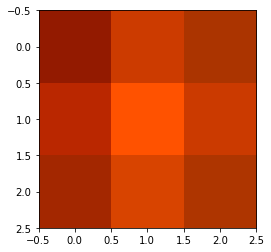

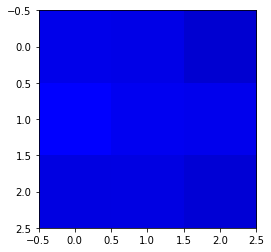

In [56]:
pos = kernel_image(first_layer_weights, 1, positive=True)
neg = kernel_image(first_layer_weights, 1, positive=False)
plt.imshow(pos)
plt.show()
plt.imshow(neg)

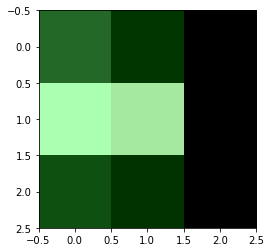

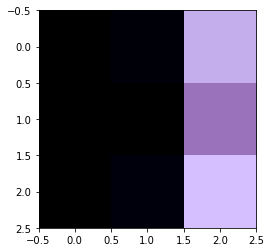

In [57]:
pos = kernel_image(first_layer_weights, 2, positive=True)
neg = kernel_image(first_layer_weights, 2, positive=False)
plt.imshow(pos)
plt.show()
plt.imshow(neg)